#Read in data

In [82]:
import pandas as pd
data = pd.read_csv('candy_crush.csv')
data

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


#Tutorial 1: EDA

In [83]:
data.head()

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True


In [84]:
data.describe()

,user_id,gate,gamerounds_sum
count,9.018900e+04,90189.000000,90189.000000
mean,4.998412e+06,40.087483,51.872457
std,2.883286e+06,9.999673,195.050858
min,1.160000e+02,30.000000,0.000000
25%,2.512230e+06,30.000000,5.000000
50%,4.995815e+06,50.000000,16.000000
75%,7.496452e+06,50.000000,51.000000
max,9.999861e+06,50.000000,49854.000000


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         90189 non-null  int64
 1   gate            90189 non-null  int64
 2   gamerounds_sum  90189 non-null  int64
 3   retention_day   90189 non-null  bool 
 4   retention_week  90189 non-null  bool 
dtypes: bool(2), int64(3)
memory usage: 2.2 MB


In [86]:
data.dtypes

user_id           int64
gate              int64
gamerounds_sum    int64
retention_day      bool
retention_week     bool
dtype: object

In [87]:
gates = data.groupby(['gate']).nunique()
gates

,user_id,gamerounds_sum,retention_day,retention_week
gate,,,,
30,44700,779,2,2
50,45489,792,2,2


In [88]:
data

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


#Tutorial 2: Marketing metrics and segmentation

In [89]:
data

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


In [90]:
total = data['user_id'].nunique()
daily_retention = data[data['retention_day'] == True]['user_id'].nunique()
weekly_retention = data[data['retention_week'] == True]['user_id'].nunique()

daily_retention_rate_1 = daily_retention/total
print(daily_retention_rate_1)
weekly_rate_1 = weekly_retention/total
print(weekly_rate_1)
daily_weekly_1 = weekly_retention/daily_retention
print(daily_weekly_1)

0.4452095044850259
0.1860648194347426
0.4179264313998954


In [91]:
#Split it into gate 30 and gate 50 tables

In [92]:
group_a = data[data['gate'] == 30]
group_b = data[data['gate'] == 50]

In [93]:
group_a

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
6,1066,30,0,False,False
11,2101,30,0,False,False
13,2179,30,39,True,False
...,...,...,...,...,...
90179,9998576,30,14,True,False
90180,9998623,30,7,False,False
90182,9999178,30,21,True,False
90183,9999349,30,10,False,False


In [94]:
total = group_a['user_id'].nunique()
daily_retention = group_a[group_a['retention_day'] == True]['user_id'].nunique()
weekly_retention = group_a[group_a['retention_week'] == True]['user_id'].nunique()

daily_retention_rate_2 = daily_retention/total
print(daily_retention_rate_2)
weekly_rate_2 = weekly_retention/total
print(weekly_rate_2)
daily_weekly_2 = weekly_retention/daily_retention
print(daily_weekly_2)

0.4481879194630872
0.19020134228187918
0.42437855645402817


In [95]:
group_b

,user_id,gate,gamerounds_sum,retention_day,retention_week
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
5,540,50,187,True,True
7,1444,50,2,False,False
...,...,...,...,...,...
90181,9998733,50,10,True,False
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90187,9999768,50,51,True,False


In [96]:
total = group_b['user_id'].nunique()
daily_retention = group_b[group_b['retention_day'] == True]['user_id'].nunique()
weekly_retention = group_b[group_b['retention_week'] == True]['user_id'].nunique()

daily_retention_rate_3 = daily_retention/total
print(daily_retention_rate_3)
weekly_rate_3 = weekly_retention/total
print(weekly_rate_3)
daily_weekly_3 = weekly_retention/daily_retention
print(daily_weekly_3)

0.44228274967574577
0.18200004396667327
0.4115015656841791


#Tutorial 3: Visualisations/Grouped data

In [97]:
plot_data = pd.DataFrame({'daily_retention_rate': [daily_retention_rate_1, daily_retention_rate_2, daily_retention_rate_3],  'weekly retention rate': [weekly_rate_1, weekly_rate_2, weekly_rate_3], 'daily_to_weekly_players':  [daily_weekly_1, daily_weekly_2, daily_weekly_3]}, index=['Overall', 'Level 30', 'Level 50'])
plot_data

,daily_retention_rate,weekly retention rate,daily_to_weekly_players
Overall,0.445210,0.186065,0.417926
Level 30,0.448188,0.190201,0.424379
Level 50,0.442283,0.182000,0.411502


Text(0, 0.5, 'Retention rate')

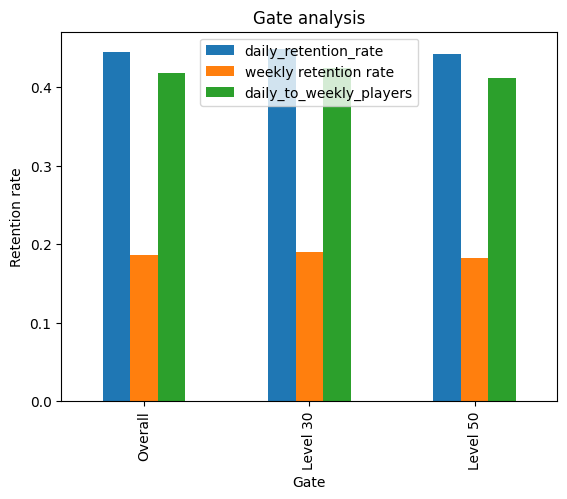

In [98]:
import matplotlib.pyplot as plt
plot_data.plot(kind="bar")
plt.title("Gate analysis")
plt.xlabel("Gate")
plt.ylabel("Retention rate")

In [99]:
data

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


In [100]:
retained = data.groupby(['gate', 'retention_day']).agg({'gamerounds_sum': 'sum'})
display(retained)

gamerounds_sum
gate retention_day                
30   False                  453351
     True                  1891444
50   False                  414556
     True                  1918974

In [101]:
retained = data.groupby(['gate', 'retention_week']).agg({'gamerounds_sum': 'sum'})
display(retained)

gamerounds_sum
gate retention_week                
30   False                   933782
     True                   1411013
50   False                   962115
     True                   1371415

In [102]:
retained = data.groupby(['gate', 'retention_day']).agg({'gamerounds_sum': 'mean'})
display(retained)

gamerounds_sum
gate retention_day                
30   False               18.379591
     True                94.411700
50   False               16.340402
     True                95.381182

In [103]:
retained = data.groupby(['gate', 'retention_week']).agg({'gamerounds_sum': 'mean'})
display(retained)

gamerounds_sum
gate retention_week                
30   False                25.796508
     True                165.962479
50   False                25.856356
     True                165.649837

#Tutorial 4: Automate analysis function

In [104]:
data

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


In [105]:
def retention_rate2(dataframe):
  total = dataframe['user_id'].nunique()
  daily_retention = dataframe[dataframe['retention_day'] == True]['user_id'].nunique()
  weekly_retention = dataframe[dataframe['retention_week'] == True]['user_id'].nunique()
  
  daily_retention_rate_1 = daily_retention/total
  print(daily_retention_rate_1)
  weekly_rate_1 = weekly_retention/total
  print(weekly_rate_1)
  daily_weekly_1 = weekly_retention/daily_retention
  print(daily_weekly_1)

In [106]:
retention_rate2(data)

0.4452095044850259
0.1860648194347426
0.4179264313998954


# Tutorial 5+6 Identifying and Resolving Inconsistency

In [107]:
data

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


array([[<Axes: title={'center': 'gamerounds_sum'}>]], dtype=object)

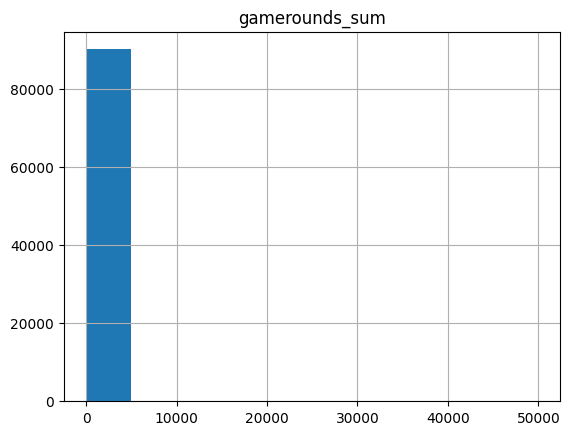

In [108]:
data.hist(column='gamerounds_sum')

In [109]:
data_2 = data[data.gamerounds_sum > 2000]
data_2

,user_id,gate,gamerounds_sum,retention_day,retention_week
6536,725080,50,2015,True,True
7912,871500,30,2961,True,True
29417,3271615,50,2640,True,False
36933,4090246,50,2124,True,True
43671,4832608,30,2438,True,True
46344,5133952,30,2251,True,True
48188,5346171,50,2294,True,True
57702,6390605,30,49854,False,True
87007,9640085,30,2156,True,True
88328,9791599,50,2063,True,True


array([[<Axes: title={'center': 'gamerounds_sum'}>]], dtype=object)

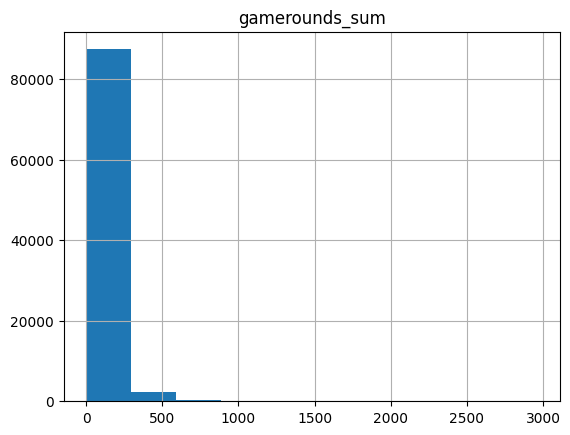

In [110]:
#data = data.drop(data[data.gamerounds_sum < 1000].index)
data = data.drop(data[data.gamerounds_sum > 40000].index)
data.hist(column='gamerounds_sum')

array([[<Axes: title={'center': 'gamerounds_sum'}>]], dtype=object)

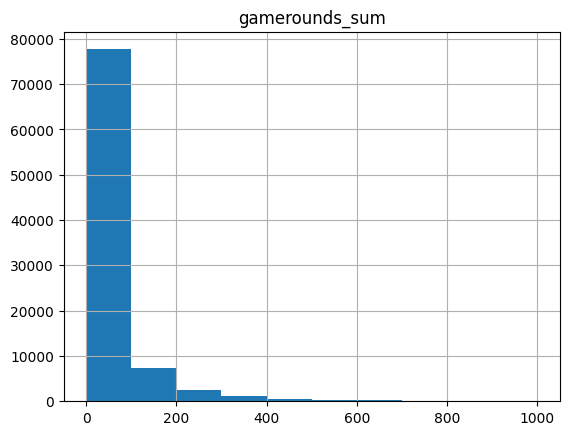

In [111]:
data = data.drop(data[data.gamerounds_sum > 1000].index)
data.hist(column='gamerounds_sum')

array([[<Axes: title={'center': 'gamerounds_sum'}>]], dtype=object)

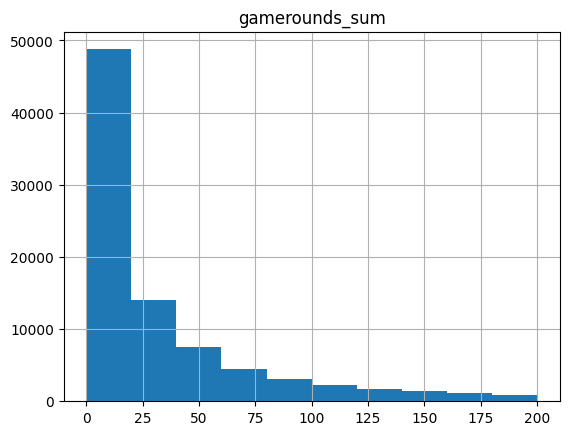

In [112]:
data = data.drop(data[data.gamerounds_sum > 200].index)
data.hist(column='gamerounds_sum')

#Tutorial 7 - A/B Testing

In [113]:
data

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


In [114]:
data.gate.unique()

array([30, 50])

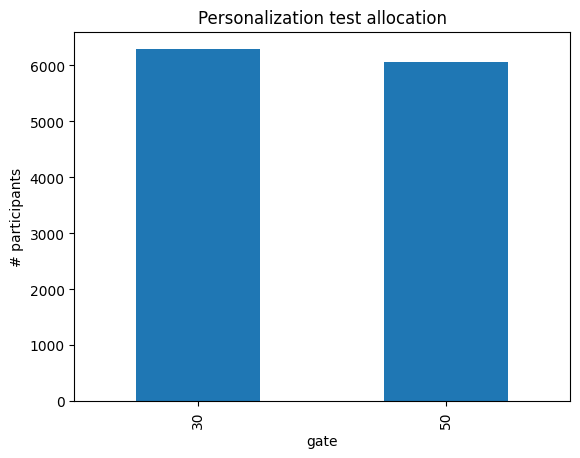

In [115]:
week_retention = data[data['retention_week'] == True]
alloc_2 = week_retention.groupby(['gate'])['user_id'].nunique()
import matplotlib.pyplot as plt
alloc_2.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [199]:
datax = data[data['retention_week']]
datax

,user_id,gate,gamerounds_sum,retention_day,retention_week
4,488,50,179,True,True
5,540,50,187,True,True
8,1574,50,108,True,True
10,1842,50,3,False,True
18,2482,30,108,True,True
...,...,...,...,...,...
90127,9991540,30,117,True,True
90134,9991949,30,191,True,True
90156,9996093,50,23,False,True
90163,9996688,30,83,True,True


In [206]:
players = data.groupby(['user_id',  'gate'])['retention_week'].max()
players_df = pd.DataFrame(players.unstack(level=1)) 
players_df

gate,30,50
user_id,,
116,False,NaN
337,False,NaN
377,NaN,False
483,NaN,False
488,NaN,True
...,...,...
9999441,NaN,False
9999479,NaN,False
9999710,False,NaN


In [207]:
players_df.columns

Int64Index([30, 50], dtype='int64', name='gate')

In [209]:
# Creata life function to calculate life for group a and b
import numpy as np

def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'

In [210]:
# Perform a t significance test for group a and b
from scipy.stats import ttest_ind

def t_statistic(a, b):
  a = a.astype(float)
  b = b.astype(float)

  t = ttest_ind(a, b)
  
  return t

In [211]:
control = players_df[30].dropna()
new = players_df[50].dropna()
# Calculate % of converted users in each group
import numpy as np
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(new))
print('lift:', lift(control, new))
print('t-statistic:', t_statistic(control, new), '\n\n')

Control conversion rate: 0.14942392208100724
Personalization conversion rate: 0.14119101490518066
lift: -5.51%
t-statistic: Ttest_indResult(statistic=3.40525731608122, pvalue=0.0006613229246709899) 




##Retention

In [118]:
import numpy as np

In [119]:
control2 = control['retention_week'].dropna()
new2 = new['retention_week'].dropna()

In [120]:
mean_control_retention = np.mean(control2)
print(f'Retention rate control: {mean_control_retention}')

Retention rate control: 0.14942392208100724


In [121]:
mean_new_retention = np.mean(new2)
print(f'Retention rate new: {mean_new_retention}')

Retention rate new: 0.14119101490518066


In [189]:
data

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


In [193]:
def ab_segmentation(gate):
  # Build a for loop for each gate in marketing
  for subgate in np.unique(data[gate].values):
      print(subgate)

      df = data[data[gate] == subgate]
      print(df)
      #Unstack the data frame
      df = pd.DataFrame(df.unstack(level=1)) 
      
      #calculate lift for current df


In [194]:
# Use ab_segmentation on age and language groups 
ab_segmentation('gate')

30
       user_id  gate  gamerounds_sum  retention_day  retention_week
0          116    30               3          False           False
1          337    30              38           True           False
6         1066    30               0          False           False
11        2101    30               0          False           False
13        2179    30              39           True           False
...        ...   ...             ...            ...             ...
90179  9998576    30              14           True           False
90180  9998623    30               7          False           False
90182  9999178    30              21           True           False
90183  9999349    30              10          False           False
90186  9999710    30              28           True           False

[42095 rows x 5 columns]
50
       user_id  gate  gamerounds_sum  retention_day  retention_week
2          377    50             165           True           False
3          483  

## Conversion

In [122]:
control3 = control['retention_day'].dropna()
new3 = new['retention_day'].dropna()

In [123]:
mean_control_conversion = np.mean(control3)
print(f'Conversion rate control: {mean_control_conversion}')

Conversion rate control: 0.4179356218078157


In [124]:
mean_new_conversion = np.mean(new3)
print(f'Conversion rate new: {mean_new_conversion}')

Conversion rate new: 0.412376664878356


#Tutorial 8 - Lift and Significant Test

In [126]:
# Calcuate the mean  
a_mean = np.mean(control2)
b_mean = np.mean(new2)
    
# Calculate the lift using a_mean and b_mean
lift = (b_mean-a_mean)/a_mean
  
# Print lift() with control and personalization as inputs
print(lift)

-0.05509765144140225


In [128]:
print(f'lift: {str(round(lift*100, 2))} %')

lift: -5.51 %


In [75]:
from scipy.stats import ttest_ind

control = control2.astype(float)
personalization = new2.astype(float)

t = ttest_ind(control, personalization)

print(t)

Ttest_indResult(statistic=3.40525731608122, pvalue=0.0006613229246709899)


In [129]:
# Calcuate the mean  
a_mean = np.mean(control3)
b_mean = np.mean(new3)
    
# Calculate the lift using a_mean and b_mean
lift = (b_mean-a_mean)/a_mean
  
# Print lift() with control and personalization as inputs
print(lift)

-0.013300988571909578


In [130]:
print(f'lift: {str(round(lift*100, 2))} %')

lift: -1.33 %


In [77]:
from scipy.stats import ttest_ind

control = control3.astype(float)
personalization = new3.astype(float)

t = ttest_ind(control, personalization)

print(t)

Ttest_indResult(statistic=1.6441738488233892, pvalue=0.10014399681407421)
